<a href="https://colab.research.google.com/github/maancham/Research-Materials/blob/main/MovieLens_user_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
!pip install wget

In [3]:
%%capture
wget.download('https://files.grouplens.org/datasets/movielens/ml-25m.zip')
!unzip ml-25m.zip

In [40]:
import pandas as pd
import numpy as np
from scipy import stats
import random

from matplotlib import pyplot as plt
import datetime

import time
import os
import wget
from IPython.display import display, HTML

In [4]:
df = pd.read_csv('/content/ml-25m/ratings.csv')
movie_df = pd.read_csv('/content/ml-25m/movies.csv')

movie_df['year'] = movie_df['title'].str.extract('.*\((.*)\).*')
movie_df['year'] = movie_df['year'].str.extract(pat='(\d+)', expand=False)
movie_df['year'] = pd.to_numeric(movie_df['year'])

# movie_df['year_bucket'] = pd.cut(movie_df['year'], 10)

df.head()

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


### The number of ratings for each user:

In [42]:
by_user_rating = df.groupby(by = 'userId').count().rating

print(by_user_rating.describe())
print("******************")

candidate_list = [100, 200, 400, 500, 1000]
for i in candidate_list:
  print("Percentile of Rating Count ", i, " : ", stats.percentileofscore(by_user_rating, i))

count    162541.000000
mean        153.807932
std         268.047590
min          20.000000
25%          36.000000
50%          71.000000
75%         162.000000
max       32202.000000
Name: rating, dtype: float64
******************
Percentile of Rating Count  100  :  60.93508714724285
Percentile of Rating Count  200  :  79.7208089035997
Percentile of Rating Count  400  :  91.60950160267255
Percentile of Rating Count  500  :  94.0399653010625
Percentile of Rating Count  1000  :  98.35610707452274


[Text(0, 0.5, 'Frequency'),
 Text(0.5, 0, 'Number of Ratings'),
 Text(0.5, 1.0, 'User Ratings Histogram')]

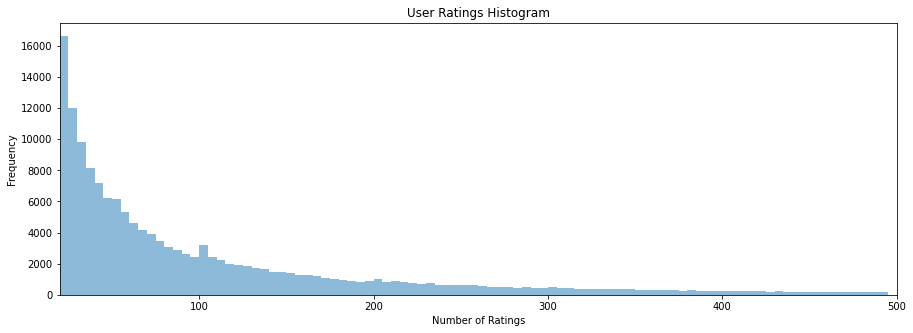

In [31]:
rating_counts = df.groupby(by = 'userId').count().rating.values



bins = np.arange(20, 500, 5)

plt.figure(figsize=(15,5))
plt.xlim([min(rating_counts), 500])
plt.hist(rating_counts, bins=bins, alpha=0.5)
plt.gca().set(xlabel='Number of Ratings', ylabel='Frequency', title='User Ratings Histogram')